## 회귀직선
* 회귀직선의 기울기는 x가 1단위 증가할 때 y가 증가하는 정도를 나타낸다.  
`회귀직선의 기울기 = r x (SDy/SDx)`
* 회귀직선의 절편은 x가 0일때 y의 추정치(평균)이다.  
* 회귀직선에 대응하는 방정식을 **회귀방정식**이라고 말한다.
* 회귀직선의 추정치는 자료가 중심에서 벗어날 수록 신뢰도가 떨어진다.  


### 회귀직선 기울기의 의미

기울기는 누군가가 '개입해' x를 바꿀경우 이에 반응해 y가 얼마나 변할지를 나타낸다. **외부개입-내부반응** 식의 해석은 자료가 통제된 실험에서 사용했을 때 일반적으로 타당하며 관측된 자료에서 혼동요인이 존재할 경우 해석에 유의해야한다.  

예를들어 소득~교육연수의 회귀방정식의 기울기가 7만원/연 이라고 가정하자. 그렇다면 정부가 무작위로 사람을 뽑아 4년간 교육을 시킨다면 이들의 평균소득이 그렇지 않은 집단보다 28만원 높을 것인가? 그렇지 않다. 통제된 실험이 아니라 관측했기 때문에 **통제되지 않은 요인**이 혼동요인으로 작용할 수 있다. 야망, 가정환경 등 다양한 혼동요인이 있다. 이는 교육연차가 소득에 미치는 영향을 왜곡하며, 기울기는 교육의 순수효과를 반영하지 못한다. 외부개입-내부반응으로 해석할 수 있는 실험은 용수철의 무게-늘어난 길이 등이 있다.

원칙적으로 실험적 통제가 가장 좋은 방법이지만 실험이 불가능 하다면 통계적 통제라도 해야한다. 중회귀분석은 특정 변수가 다른 변수와 어떻게 관련하는지 알려주는 통계적 통제 방법이다.

### 결정 계수

하나의 y값과 y 평균의 차이는 다음과 같이 분해할 수 있다.
`y - mean(y) = ( y_pred - mean(y) ) + (y - y_pred)`  
하나의 y값에 대한 y평균과의 차이는 '평균에 의한 차이(SSR, 회귀제곱합)'와 '모델로 예측할 수 없는 차이(SSE, 잔차제곱합)'로 분해할 수 있다. 결정 계수는 SSR/SST로 계산하며, 모델로 예측할 수 없는 차이가 클 수록 설명력이 떨어지는 모델이라고 말할 수 있다.

설명변수가 많아질수록 결정계수는 증가하기 때문에 단순히 모델간 결정 계수를 비교하는 것은 의미가 없다. 그래서 수정된 결정 계수를 사용한다.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression

In [49]:
def mr_squared(model, x, y):
    return 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

def plot_y(model, age, y):
    y_pred = model.predict(x)
    plt.figure(figsize=(12,5))
    plt.scatter(age, y, color = 'deepskyblue', label='y')
    plt.scatter(age, y_pred, color='deeppink', label='y_hat')
    plt.axhline(np.mean(y), color='lime',label='y_mean')
    plt.title('income_per_hour for age')
    plt.xlabel('AGE')
    plt.ylabel('Income_per_hour')
    plt.legend()
    plt.show()

* 주평균 소득 = 월 평균 소득/4
* 봉급 생활자 시간당 평균 소득 = 주 평균 소득 / P15
* 자영업자 시간당 평균 소득 = 주 평균 소득 / P25

가로축이 연령이고 세로축이 시간 당 임금인 산포도를 그려라

In [50]:
data_route = r'D:\document\data\통계학_류근관\daewoo.xls'
df = pd.read_excel(data_route)

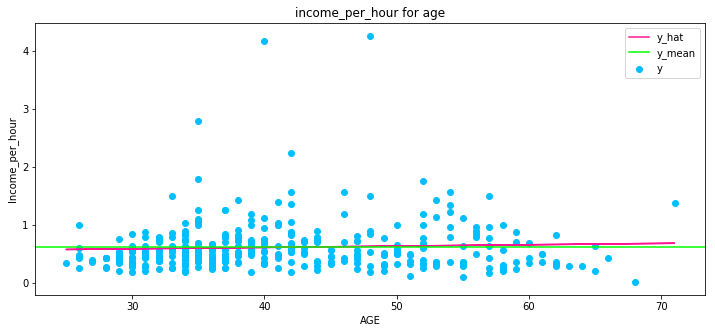

alpha [0.00232488] beta [0.51312969]


In [51]:
tmp_df = df[(df['JOB1']==1) | (df['JOB1']==2)] # 자영업자와 봉급생활자만 뽑는다.
income_per_hour = []
for i in range(tmp_df.shape[0]):
    row = tmp_df.iloc[i]
    if row['JOB1'] == 1:
        income_per_hour.append((row['P19']/4)/row['P15'])
    else:
        income_per_hour.append((row['P29']/4)/row['P25'])
        
# 결축치 대치
x = tmp_df['AGE1'].values.reshape(-1, 1)
y = np.array(income_per_hour).reshape(-1, 1)
y[np.isnan(y)] = np.nanmean(y)

lm = LinearRegression()
lm.fit(x,y)

alpha = lm.coef_[0]
beta = lm.intercept_
y_pred = lm.predict(x)


plt.figure(figsize=(12,5))
plt.scatter(x=tmp_df['AGE1'], y=income_per_hour, color = 'deepskyblue', label='y')
plt.plot(x,y_pred, color='deeppink', label='y_hat')
plt.axhline(np.mean(y), color='lime',label='y_mean')
plt.title('income_per_hour for age')
plt.xlabel('AGE')
plt.ylabel('Income_per_hour')
plt.legend()
plt.show()

print(f'alpha {alpha} beta {beta}')

In [52]:
min(tmp_df['AGE1'])

25

2. W = a + b*AGE + u 회귀식을 만들고 시간당 임금이 어떻게 다른지 분석하라  
1) 각 계수의 최소자승 추정량을 구하고 그 결과를 해석하라  
`a+u = 0.00232, b = 0.513`  
연령이 한살 증가하면 시간 당 소득은 2.32원 증가한다. 25세의 평균 시간당 소득은 513원이다.

2) 위 모형은 연령과 임금관의 관계를 잘 설명한다고 볼 수 있는가?  
* SST = 총제곱합(y-y_mean 의 제곱 합)  
* SSR = 회귀제곱합(y_hat-y_mean 의 제곱합)  
* SSE = 잔차제곱합(y-y_mean)  
* r_square = SSR/SST = 1 - SSE/SST    


결정 계수의 값이 0.0029다. 총제곱합의 99.7% 가 SSE이므로 연령과 임금의 관계를 잘 설명하지 못한다고 말할 수 있다. 직업, 성별 등의 혼동요인이 존재하므로 이들을 포함한 중회귀모델을 만들어야 한다.

In [53]:
SST = np.sum((y - np.mean(y))**2)
SSR = np.sum((y_pred - np.mean(y))**2)
r_squared = SSR/SST
print(r_squared)
print(lm.score(x,y))

0.002930656231125949
0.002930656231125872


3. 다음 회귀식으로 연령별 임금 분포를 설명하라  

`W = a + b*AGE + c*AGE^2 + u`  

b = 0.069  
c = -0.0076  
a+u = -0.892  
r_squared = 0.03

회귀선이 포물선 형태로 변한다. 45-50세 구간에서 임금의 최댓값이 나타난다.


In [57]:
age = tmp_df['AGE1'].values.reshape(-1,1)
age_squared = np.square(age).reshape(-1,1)
x = np.hstack((age,age_squared))
lm_2 = LinearRegression()
lm_2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
a = lm_2.coef_
b = lm_2.intercept_
mr_squared(lm_2, x, y)

0.030245302426600396

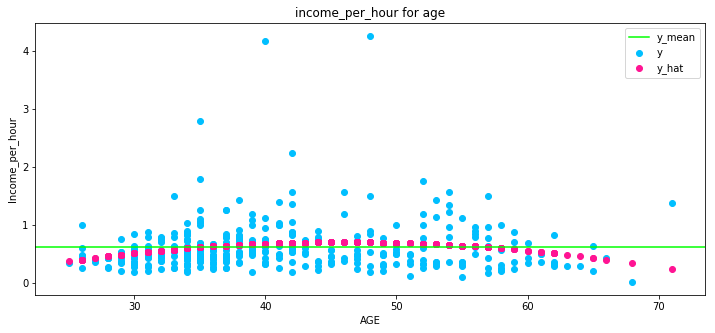

In [59]:
plot_y(lm_2,age,y)

3. 다음 회귀분석 모형을 이용해 성별이 임금에 미치는 영향을 분석하라  
`w = a + b*AGE + c*AGE^2 + d*SEX + u`    
    * r_squared : 0.033
    * a = -0.7  
    * b = 0.068
    * c = -0.00074
    * d = -0.16
    
여성이 남성에 비해 시간당 평균 865원을 덜 받는다.

In [81]:
sex = tmp_df['SEX1'].values
sex = np.apply_along_axis(lambda x: x-1, 0, sex).reshape(-1,1)
x = np.hstack((age, age_squared, sex))
lm_3 = LinearRegression()
lm_3.fit(x,y)
r_squared = mr_squared(lm_3,x,y)
coef = lm_3.coef_
inter = lm_3.intercept_
print(r_squared, coef, inter)

0.03398849036370377 [[ 0.06772417 -0.00073    -0.16627702]] [-0.8659325]
